In [111]:
# ws05

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time


In [112]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [113]:
X = df.drop('species', axis=1)
X.head() 

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [114]:
y = df.species
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [115]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

sc_df = pd.DataFrame(X_sc, columns=['SL', 'SW', 'PL','PW'])
sc_df.head()

,SL,SW,PL,PW
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [116]:
df.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [117]:
sc_df.describe().round(2)

,SL,SW,PL,PW
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.43,-1.57,-1.45
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.13,0.34,0.13
75%,0.67,0.56,0.76,0.79
max,2.49,3.09,1.79,1.71


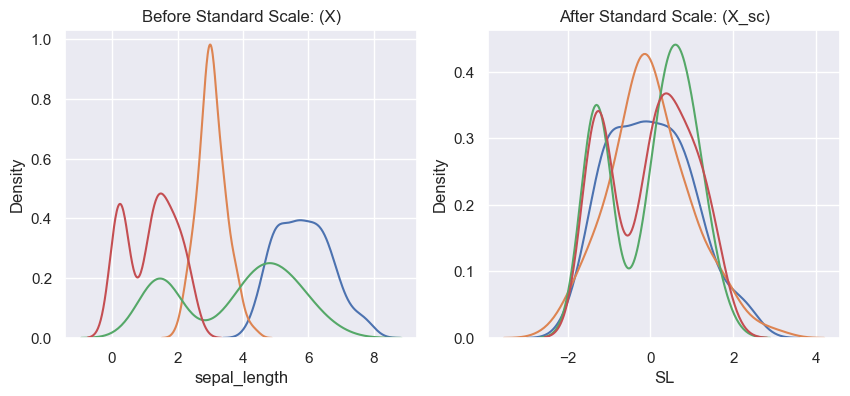

In [118]:
sns.set_theme()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.set_title('Before Standard Scale: (X)')
sns.kdeplot(df['sepal_length'], ax=ax1, label='SL')
sns.kdeplot(df['sepal_width'], ax=ax1, label='SW')
sns.kdeplot(df['petal_length'], ax=ax1, label='PL')
sns.kdeplot(df['petal_width'], ax=ax1, label='PW')

ax2.set_title('After Standard Scale: (X_sc)')
sns.kdeplot(sc_df['SL'], ax=ax2)
sns.kdeplot(sc_df['SW'], ax=ax2)
sns.kdeplot(sc_df['PL'], ax=ax2)
sns.kdeplot(sc_df['PW'], ax=ax2)
plt.show()

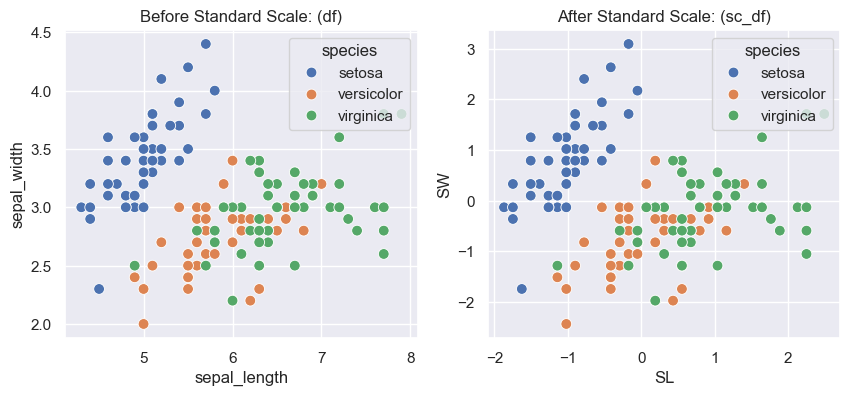

In [119]:
sc_df['species'] = df.species #
sns.set_theme()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.set_title('Before Standard Scale: (df)')
sns.scatterplot(x='sepal_length',y='sepal_width',data=df, hue='species', ax=ax1, s=60)

ax2.set_title('After Standard Scale: (sc_df)')
sns.scatterplot(x='SL',y='SW',data=sc_df, hue='species', ax=ax2, s=60)

plt.savefig('std scale02',dpi=120)
plt.show()

### ws06

In [120]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_sc)

df['pca1'] = X_pca[:,0] # pca
df['pca2'] = X_pca[:,1]
df['pca3'] = X_pca[:,2]
df['pca4'] = X_pca[:,3]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pca1,pca2,pca3,pca4
0,5.1,3.5,1.4,0.2,setosa,-2.264703,0.480027,0.127706,-0.024168
1,4.9,3.0,1.4,0.2,setosa,-2.080961,-0.674134,0.234609,-0.103007
2,4.7,3.2,1.3,0.2,setosa,-2.364229,-0.341908,-0.044201,-0.028377
3,4.6,3.1,1.5,0.2,setosa,-2.299384,-0.597395,-0.091290,0.065956
4,5.0,3.6,1.4,0.2,setosa,-2.389842,0.646835,-0.015738,0.035923


In [121]:
df.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width,pca1,pca2,pca3,pca4
count,150.00,150.00,150.00,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,0.00,-0.00,-0.00,0.00
std,0.83,0.44,1.77,0.76,1.71,0.96,0.38,0.14
min,4.30,2.00,1.00,0.10,-2.77,-2.65,-1.01,-0.47
25%,5.10,2.80,1.60,0.30,-2.10,-0.60,-0.19,-0.09
50%,5.80,3.00,4.35,1.30,0.42,0.02,-0.02,-0.01
75%,6.40,3.30,5.10,1.80,1.34,0.59,0.26,0.07
max,7.90,4.40,6.90,2.50,3.31,2.69,0.86,0.49


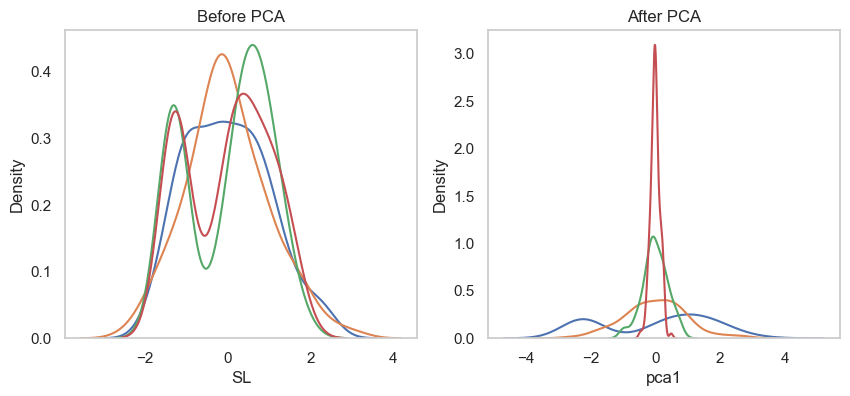

In [122]:
sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.set_title('Before PCA')

sns.kdeplot(sc_df['SL'], ax=ax1)
sns.kdeplot(sc_df['SW'], ax=ax1)
sns.kdeplot(sc_df['PL'], ax=ax1)
sns.kdeplot(sc_df['PW'], ax=ax1)
ax1.grid(False)

ax2.set_title('After PCA')

sns.kdeplot(df['pca1'], ax=ax2)
sns.kdeplot(df['pca2'], ax=ax2)
sns.kdeplot(df['pca3'], ax=ax2)
sns.kdeplot(df['pca4'], ax=ax2)
ax2.grid(False)
plt.show()

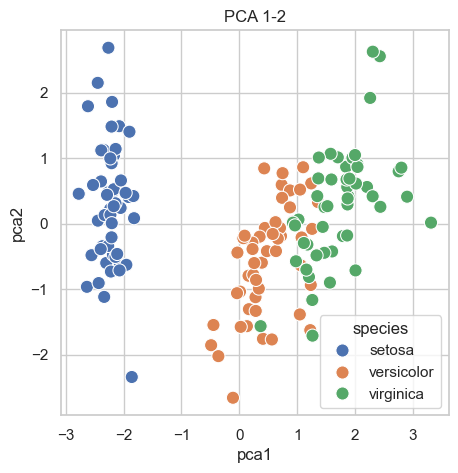

In [123]:
sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = 5, 5
sns.scatterplot(x='pca1', y='pca2', data=df, hue='species', s=90)
plt.title('PCA 1-2')
plt.show()

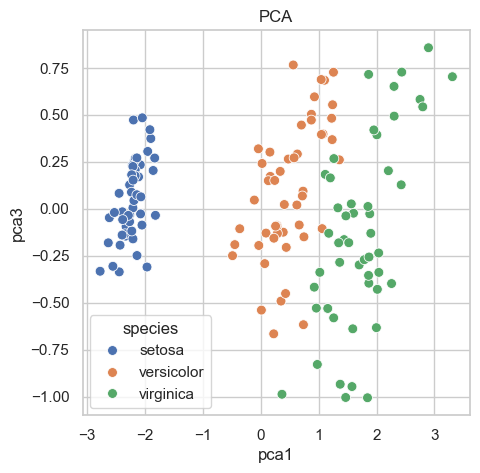

In [124]:

sns.scatterplot(x='pca1', y='pca3', data=df, hue='species', s=50)
plt.title('PCA')
plt.show()

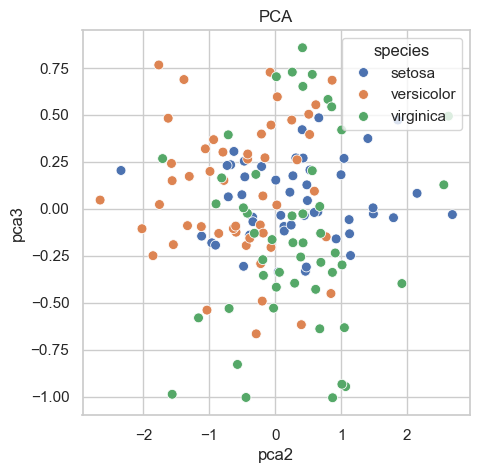

In [125]:
sns.scatterplot(x='pca2', y='pca3', data=df, hue='species', s=50)
plt.title('PCA')
plt.show()

In [126]:
exp_variance = pca.explained_variance_ratio_
exp_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

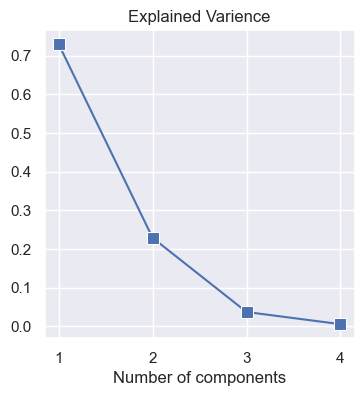

In [127]:
sns.set_theme()
plt.rcParams['figure.figsize'] = 4, 4

x = list(range(1, len(exp_variance)+1))
sns.lineplot(x=x, y=exp_variance, marker='s', markersize=8)
plt.xticks(x)

plt.title('Explained Varience')
plt.xlabel('Number of components')

plt.show()

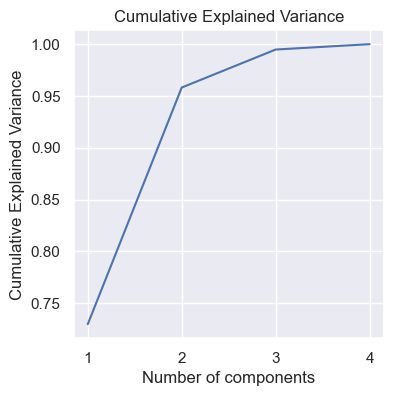

In [128]:
import numpy as np
sns.set_theme()

plt.rcParams['figure.figsize'] = 4, 4

x = list(range(1, len(exp_variance)+1))
plt.plot(x, np.cumsum(pca.explained_variance_ratio_))
plt.xticks(x)
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance');
plt.title('Cumulative Explained Variance');

plt.show()

In [129]:
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

In [130]:
x

[1, 2, 3, 4]

In [131]:
pca_num = PCA(.95)
pca_num.fit(X)
pca_num.n_components_

2

ws07

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 

In [133]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [134]:
# X_train.head()
X_train[:3] #.head()

,sepal_length,sepal_width,petal_length,petal_width
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2


In [135]:
pca = PCA()

pca = PCA(n_components=2)

start = time()
pca.fit(X_sc)

X_train_sc = sc.transform(X_train)
X_train_pca = pca.transform(X_train_sc) 

X_test_sc = sc.transform(X_test)
X_test_pca = pca.transform(X_test_sc)

print('{:.5f} sec' . format(time() - start))

X_train_pca.shape, X_test_pca.shape

0.00300 sec


((120, 2), (30, 2))

In [136]:

from sklearn.svm import SVC

model = SVC(kernel='linear') 

start = time()
model.fit(X_train_pca, y_train)
print('{:.5f} sec' . format(time() - start))

y_pred = model.predict(X_test_pca)

0.00100 sec


In [137]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score # may use score of the model

cm = confusion_matrix(y_test, y_pred)

print('Accuracy {:.3f}'.format(accuracy_score(y_test, y_pred)))
print(cm)

Accuracy 0.933
[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]


In [138]:
from sklearn.model_selection import cross_val_score

X_pca = pca.transform(X_sc)

cvs = cross_val_score(model, X_pca, y, cv=10)  
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100 ))

cross val scores [0.87 0.93 1.   0.93 0.87 0.8  0.93 0.87 1.   0.93]
Average (%) = 91.33


In [139]:
pca

PCA(n_components=2)

In [140]:
# Predict

X_pca = pca.transform(X_sc)
model.fit(X_pca, y) # again because you run cross val score

X_new = [
         [4.8,3.1,1.6,0.4],
         [6.8,3.1,4.6,1.4],
         [6.6,3.1,5,2]
        ]

X_new_sc = sc.transform(X_new)
X_new_pca = pca.transform(X_new_sc)
y_pred = model.predict(X_new_pca)
print(y_pred) 

['setosa' 'versicolor' 'virginica']


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [141]:
# pipe
from sklearn.pipeline import Pipeline

n_comp = 3
pipe = Pipeline([
                 ('scaler', StandardScaler()),
                 ('pca', PCA(n_components=n_comp)),
                 ('linsvc', SVC(kernel='linear'))
               ])

pipe.fit(X_train, y_train)
X_new = [
         [4.8,3.1,1.6,0.4],
         [6.8,3.1,4.6,1.4],
         [6.6,3.1,5,2]
        ]
print(pipe.predict(X_new))

['setosa' 'versicolor' 'virginica']


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [142]:
from sklearn.pipeline import Pipeline

n_comp = 3
pipe = Pipeline([
                 ('scaler', StandardScaler()),
                 ('pca', PCA(n_components=n_comp)),
                 ('linsvc', SVC(kernel='linear'))
               ])

cvs = cross_val_score(pipe, X, y, cv=10)  # no need to use model.fit
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100 ))

cross val scores [1.   1.   1.   1.   0.87 1.   0.87 1.   1.   1.  ]
Average (%) = 97.33
